In [1]:
import matplotlib
from plantcv import plantcv as pcv
from plantcv.utils import tabulate_bayes_classes
from plantcv.learn import naive_bayes_multiclass
import numpy as np

In [2]:
matplotlib.rcParams["figure.max_open_warning"] = False
pcv.params.debug = "plot"
pcv.params.text_size = 30
pcv.params.text_thickness = 20
pcv.params.line_thickness = 10

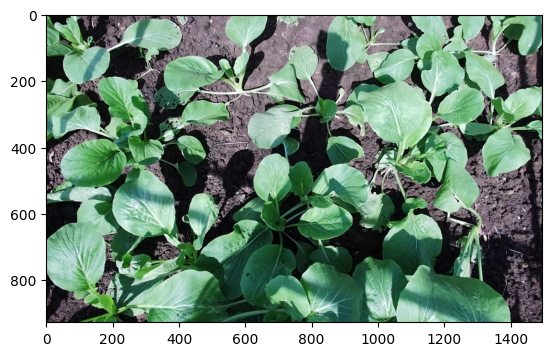

In [5]:
color_img, path, filename = pcv.readimage(filename=r"C:\Plant_analysis\notebooks\datasets\cantonese\8.png")

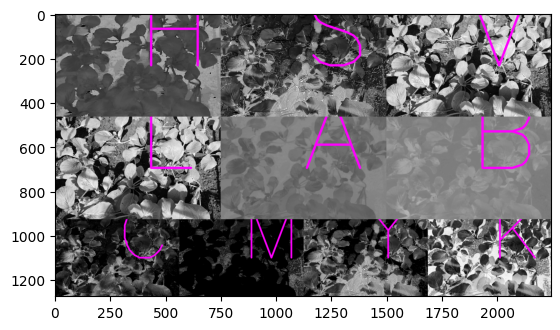

In [6]:
colorspaces = pcv.visualize.colorspaces(rgb_img=color_img, original_img=False)

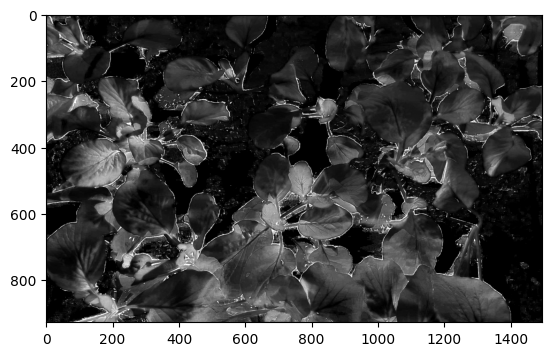

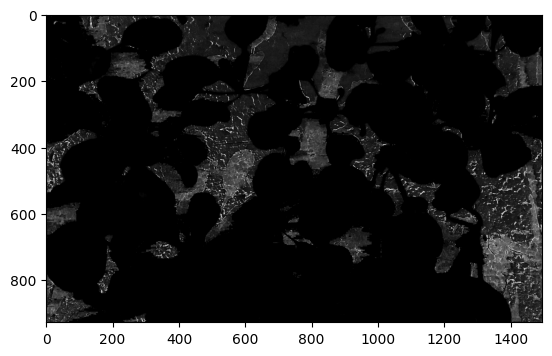

In [7]:
c = pcv.rgb2gray_cmyk(rgb_img=color_img, channel='c')
m = pcv.rgb2gray_cmyk(rgb_img=color_img, channel='m')   

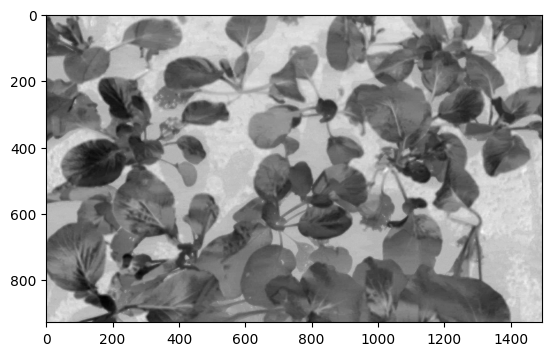

In [8]:
a = pcv.rgb2gray_lab(rgb_img=color_img, channel='a')

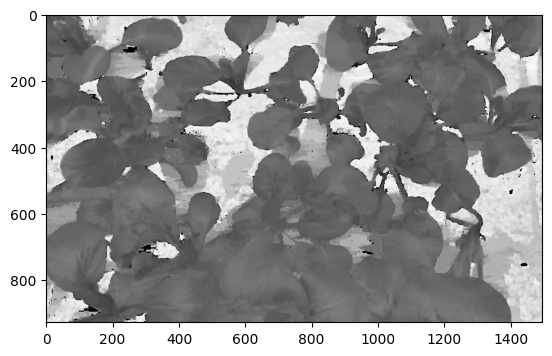

In [9]:
h = pcv.rgb2gray_hsv(rgb_img=color_img, channel='h')

In [10]:
hist_a = pcv.visualize.histogram(img=a, bins=25)

alt.Chart(...)

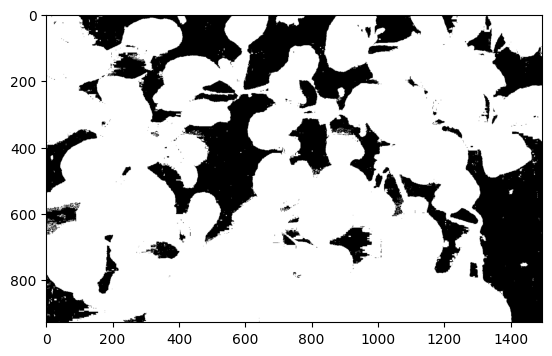

In [11]:
threshold_mean = pcv.threshold.mean(gray_img=h, ksize=2000, offset=5,
                                    object_type='dark')

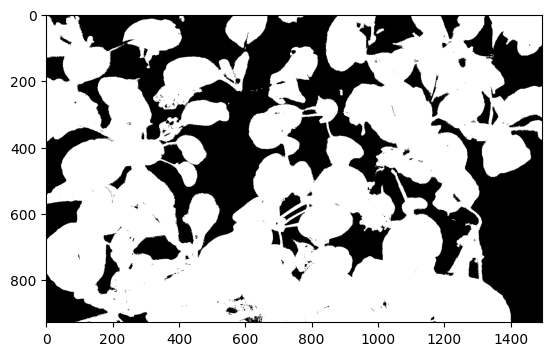

In [12]:
a_thresh = pcv.threshold.binary(gray_img=a, threshold=120, object_type='dark')

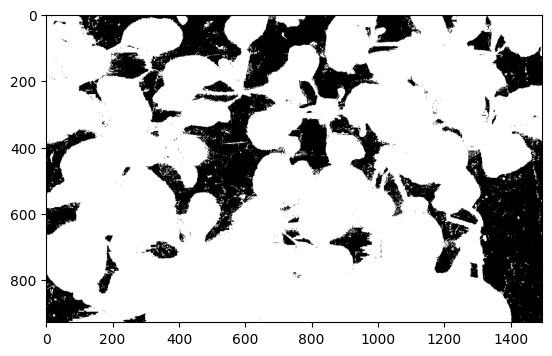

In [13]:
m_thresh = pcv.threshold.binary(gray_img=m, threshold=15, object_type='dark')

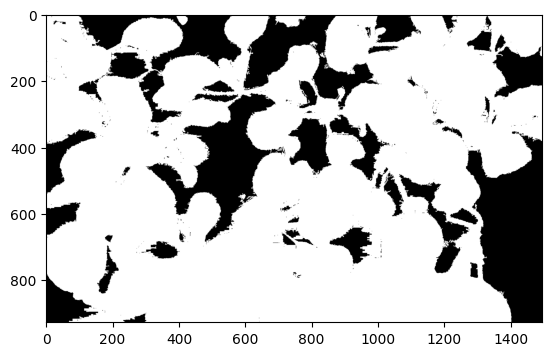

In [19]:
a_fill = pcv.fill(bin_img=m_thresh, size=200)

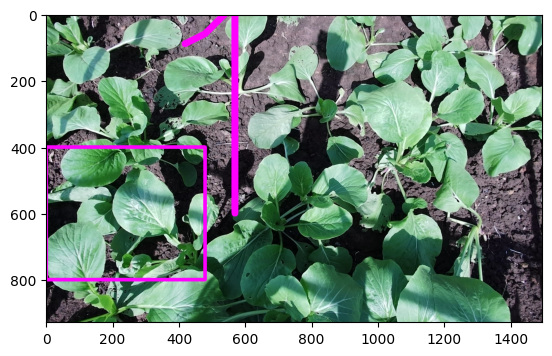

In [15]:
roi = pcv.roi.rectangle(img=color_img, x=0, y=400, w=480, h=400)

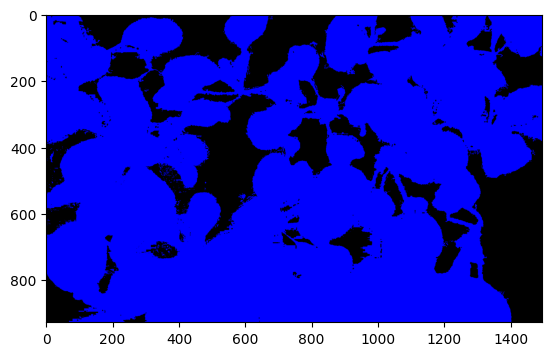

In [16]:
labeled_mask, num_plants = pcv.create_labels(mask=m_thresh, rois=roi, roi_type='partial')

In [20]:
from plantcv.plantcv.analyze import color as analyze_color
analyze_color(rgb_img=color_img, labeled_mask=labeled_mask, colorspaces='hsv')

alt.FacetChart(...)

alt.FacetChart(...)

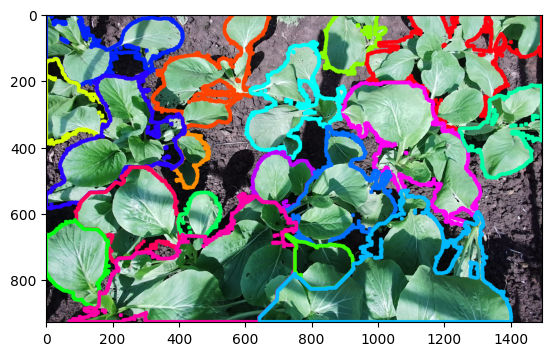

TypeError: The 'out' kwarg is necessary. Use numpy.strings.multiply without it.

In [18]:
labels = pcv.watershed_segmentation(rgb_img=color_img, mask=m_thresh, distance=100)

# Utilize the labeled mask, n_labels -1 since we don't want to analyze background  
shape_img = pcv.analyze.size(img=color_img, labeled_mask=labels, n_labels=np.unique(labels)-1)


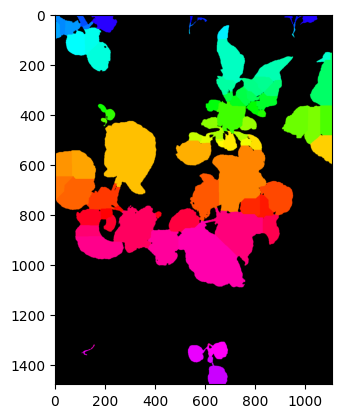

In [ ]:
colored_img = pcv.visualize.colorize_label_img(label_img=labels)